In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [17]:
data_df = pd.read_excel('Industry_Portfolios.xlsx')
data_df2 = data_df.drop(['Date'],axis=1).copy()

mean_returns = data_df2.mean()

data_table = pd.DataFrame(data_df2.mean(),columns = ['mean'])
data_table['std']=data_df2.std()

R = np.array(data_table['mean'])
cov_matrix = data_df2.cov()

In [18]:
def monte_carlo_1(R,cov_matrix,number_of_industries,data_points_needed):
    data_points = []
    for i in range(0,data_points_needed):
        w_vector = np.array([])

        for i in range(0,number_of_industries):
            w = np.random.uniform()
            w_vector = np.append(w_vector,w)
            final_w_vector = w_vector/sum(w_vector)

        simulated_mean_return = np.dot(final_w_vector.T,R)
        simulated_var = np.dot(np.dot(final_w_vector.T,cov_matrix) ,final_w_vector)
        simulated_sd = np.sqrt(simulated_var)
        
        simulated_point = (simulated_sd,simulated_mean_return)
        data_points.append(simulated_point)
        
    return data_points

Text(0, 0.5, 'Mean Return (%)')

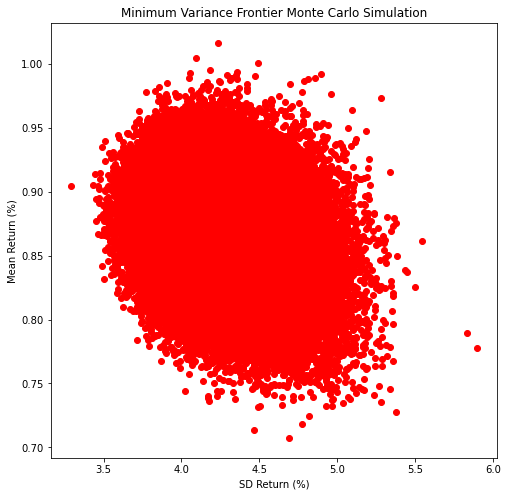

In [19]:
data_points = monte_carlo_1(R,cov_matrix,10,100000)
x_val = [x[0] for x in data_points]
y_val = [x[1] for x in data_points]

figure(figsize=(8, 8))
plt.plot(x_val,y_val,'or')
plt.title('Minimum Variance Frontier Monte Carlo Simulation')
plt.xlabel('SD Return (%)')
plt.ylabel('Mean Return (%)')

In [20]:
def monte_carlo_2(R,cov_matrix,number_of_industries,data_points_needed):
    data_points = []
    for i in range(0,data_points_needed):
        w_vector = np.array([])

        for i in range(0,number_of_industries):
            w = 1/np.random.uniform()
            w_vector = np.append(w_vector,w)
            final_w_vector = w_vector/sum(w_vector)

        simulated_mean_return = np.dot(final_w_vector.T,R)
        simulated_var = np.dot(np.dot(final_w_vector.T,cov_matrix),final_w_vector)
        simulated_sd = np.sqrt(simulated_var)

        simulated_point = (simulated_sd,simulated_mean_return)
        data_points.append(simulated_point)
        
    return data_points

Text(0, 0.5, 'Mean Return (%)')

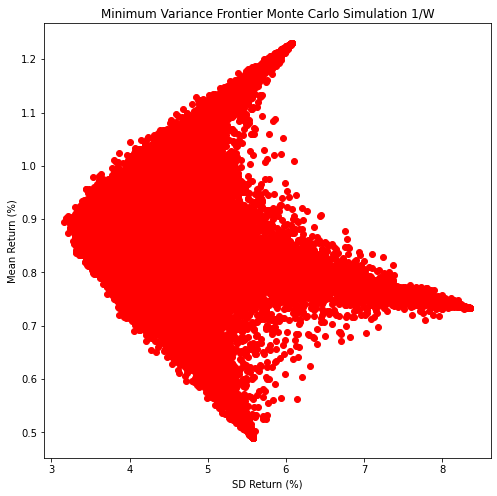

In [21]:
data_points = monte_carlo_2(R,cov_matrix,10,100000)
x_val = [x[0] for x in data_points]
y_val = [x[1] for x in data_points]

figure(figsize=(8, 8))
plt.plot(x_val,y_val,'or')
plt.title('Minimum Variance Frontier Monte Carlo Simulation 1/W')
plt.xlabel('SD Return (%)')
plt.ylabel('Mean Return (%)')